# 导入相应的包

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 初始化超参数和数据集

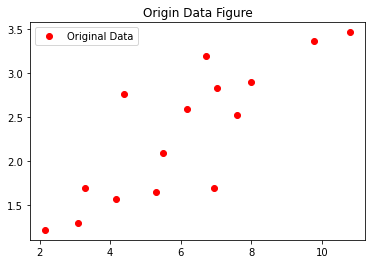

In [8]:
input_size = 1  # 网络输入数量
output_size = 1 # 网络输出的结果的数量
num_epochs = 60 # 迭代的代数
learning_rate = 0.001

x_trian = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

plt.plot(x_trian, y_train, 'ro', label='Original Data')
plt.title("Origin Data Figure")
plt.legend()
plt.show()

# 创建模型，开始迭代

Epoch [5/60], Loss:11.2788
Epoch [10/60], Loss:4.8635
Epoch [15/60], Loss:2.2640
Epoch [20/60], Loss:1.2104
Epoch [25/60], Loss:0.7831
Epoch [30/60], Loss:0.6095
Epoch [35/60], Loss:0.5387
Epoch [40/60], Loss:0.5095
Epoch [45/60], Loss:0.4972
Epoch [50/60], Loss:0.4917
Epoch [55/60], Loss:0.4890
Epoch [60/60], Loss:0.4874


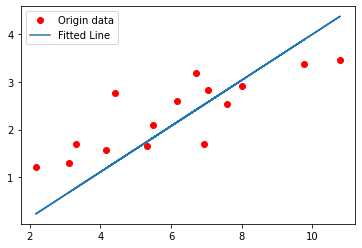

In [9]:
# 选择模型
model = nn.Linear(input_size, output_size)
# 选择损失函数和优化器
loss_fn = nn.MSELoss()  # 均方误差，用于回归任务
# 创建优化器，使用随即梯度下降法
optmizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(num_epochs):
    # 将numpy对象转化为tensor
    input = torch.from_numpy(x_trian)
    target = torch.from_numpy(y_train)
    # 获得模型的输出，作了一次正向传播
    outputs = model(input)
    loss = loss_fn(outputs, target)
    # 反向传播与优化
    optmizer.zero_grad()  # 优化器梯度置为0
    loss.backward()  # 反向传播，计算梯度保存在tensor的grad属性中
    optmizer.step() # 一次优化
    if (epoch+1) % 5 == 0:
        # 从单元素tensor中获取值，使用item()方法
        print('Epoch [{}/{}], Loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))
    
# detach()方法，从计算图中获得一个值，且这个tensor永远不用计算其梯度
# tensor的numpy()方法，返回对应的numpy数组
predicted = model(torch.from_numpy(x_trian)).detach().numpy()
plt.plot(x_trian,y_train,'ro',label='Origin data')
plt.plot(x_trian,predicted,label='Fitted Line')
plt.legend()  # 给图像加上图例
plt.show()



# 模型保存

In [10]:
torch.save(model.state_dict(), 'model.ckpt')